<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Python_Fuzzy___Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=DutyveSDOJY

In [ ]:
%%capture
!pip install scikit-fuzzy

# SIMPLE FUZZY LIGIC FOR DETERMINING STUDENTS PERFORMANCE

## Determine Student's Performance

We are going to determine performance, base on two inputs intelligence (grade points between 0.00 - 4.00 point) and diligence (absence per annual in percentage teween 0%-10%).

### Antecenents (Inputs)
- Intelligence with linguistic variables: veryingnorance, ignorance, clever, very clever
- Diligence with linguistic variable: lazy, medium, diligent

### Consequents (Outputs)
- Performance with linguistic variables: bad, good

### Rules
- IF (intelligence == 'veryingnorance') || (intelligencew == 'ignorance') || (diligence = 'lazy') || (diligent == 'medium') THEN (performance == 'bad')

- IF ((intelligence == 'clever') && (diligence == 'diligent')) || ((inteligence == 'veryclever') && (diligence == 'diligent')) THEN (performance == 'good')

### Usage
What is the performance if somebody has 3.10 point intelligence scoore and 3% for diligent scoore.

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

### Define the membership functions

In [ ]:
intelligence = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'intelligence')
diligence    = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'diligence')
performance  = ctrl.Consequent(np.arange(0, 101, 1), 'performance')

### Make Membership Function for intelligence, diligence and performace

In [ ]:
intelligence['veryignorance'] = fuzzy.trapmf(intelligence.universe, [0.0, 0.0, 2.0, 2.5])
intelligence['ignorance']     = fuzzy.trimf(intelligence.universe, [2.0, 2.5, 3.0])
intelligence['clever']        = fuzzy.trimf(intelligence.universe, [2.5, 3.0, 3.5])
intelligence['veryclever']    = fuzzy.trapmf(intelligence.universe, [3.0, 3.5, 4.0, 4.0])

diligence['diligent'] = fuzzy.trapmf(diligence.universe, [0, 0, 1, 4])
diligence['medium']   = fuzzy.trimf(diligence.universe, [1, 5, 9])
diligence['lazy']     = fuzzy.trapmf(diligence.universe, [6, 9, 10, 10])

performance['bad']  = fuzzy.trapmf(performance.universe, [0, 0, 25, 75])
performance['good'] = fuzzy.trapmf(performance.universe, [25, 75, 100, 100])

### Membership function has centroid method by default

In [ ]:
type(performance)
performance.defuzzify_method

'centroid'

### Defuzzify method can be changed

In [ ]:
performance.defuzzify_method = 'mom'      # Mean of Maximum

performance.defuzzify_method = 'centroid' # Centroid same as skfuzzy.centroid
performance.defuzzify_method = 'bisector' #
performance.defuzzify_method = 'som'      # minimum of maximum
performance.defuzzify_method = 'lom'      # maximum of maximum

In [ ]:
intelligence.defuzzify_method

'centroid'

In [ ]:
diligence.defuzzify_method

'centroid'

### View the fuzzy membership function for all parmameters

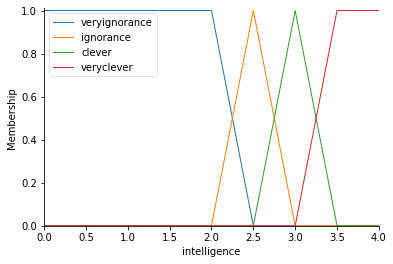

In [ ]:
intelligence.view()

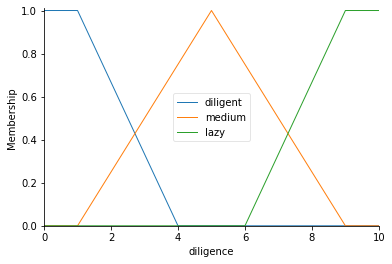

In [ ]:
diligence.view()

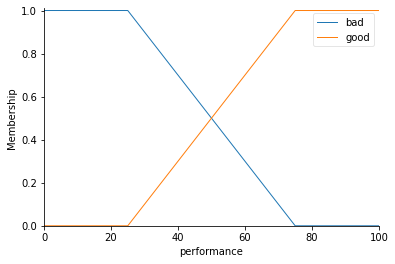

In [ ]:
performance.view()

### Determine all rules required

In [ ]:
rule1 = ctrl.Rule(intelligence['veryignorance'] | 
                  intelligence['ignorance'] | 
                  diligence['lazy'] |
                  diligence['medium'], consequent = performance['bad'])

rule2 = ctrl.Rule((intelligence['clever'] & diligence['diligent']) | 
                  (intelligence['veryclever'] & diligence['diligent']), consequent = performance['good'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2ca44e2310>)

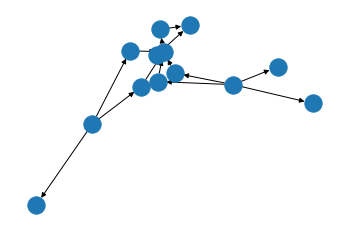

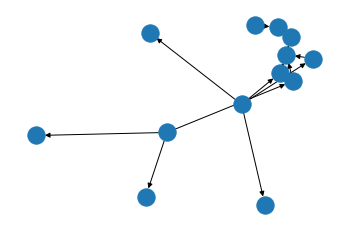

In [ ]:
rule1.view()
rule2.view()

### Simulate the input and fuzzy rulebase

In [ ]:
performance_point_ctrl = ctrl.ControlSystem([rule1, rule2])

In [ ]:
performance_point = ctrl.ControlSystemSimulation(performance_point_ctrl)

### Pass inputs to the ControlSystem using Antecedent labels with Pythonic API

In [ ]:
performance_point.input['intelligence'] = 3.1
performance_point.input['diligence'] = 3

In [ ]:
# Crunch the numbers
performance_point.compute()

Performance:  50.0


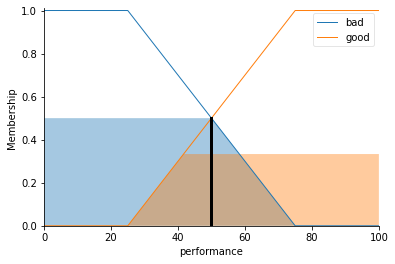

In [ ]:
performance.view(sim = performance_point)

print('Performance: ', performance_point.output['performance'])

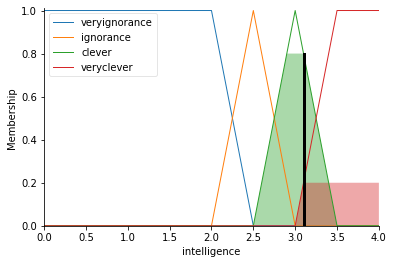

In [ ]:
intelligence.view(sim = performance_point)

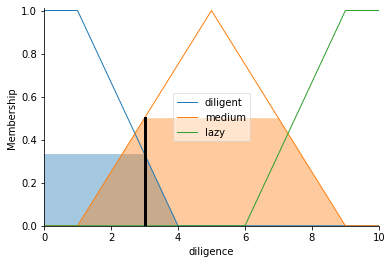

In [ ]:
diligence.view(sim = performance_point)

### Performance is the combination of output of the rules

```
Ha a  diligece     = 3   akkor diligent 0.5 és medium 0.35
Ha az intelligence = 3.1 akkor clever   0.8 és veryclever 0.2

Rule1 = Ha a diligent['medium'](0.35) akkor a performance['bad']

Rule2 = Ha az intelligence['clever'](0.8) és a diligence['diligent'](0.5) akkor a performance['good']

Rule2 = Ha az intelligence['veryclever'](0.2) és a diligence['diligent'](0.5) akkor a performance['good']


Tehát 0.5 * bad és 0.35 * good

performance = (0.5*25+0.35*75)/(0.5+0.35) = 38.75/0.85 = 45.5882352941

A 25 azért mert a performancenal ott kezdődik csökkenni a bad
A 75 azért mert a performancenal ott kezdődik tetőzni a good


Másképpen fogalmazva 0.5 bad értékhez 50 pont performance tartozik
és 0.35 good értékhez 41 pont performance tartozik és ennek a kettőnek
az átlagát kell venni lásd a performance.view(sim = performance_point ) ábrát
```



https://youtu.be/DnfWFgovIeU?t=521

A fentiekhez magyarázat

In [ ]:
rule1 = ctrl.Rule(intelligence['veryignorance'] | 
                  intelligence['ignorance'] | 
                  diligence['lazy'] |
                  diligence['medium'], consequent = performance['bad'])

rule2 = ctrl.Rule((intelligence['clever'] & diligence['diligent']) | 
                  (intelligence['veryclever'] & diligence['diligent']), consequent = performance['good'])

https://youtu.be/RDJWlMiPSWQ?t=542

A fentiekhez magyarázat
